### Load data

In [45]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

from lib.data_preparation import DataPreparation
from lib.preprocessing_data import Preprocessing


data_set = DataPreparation().load_data()
data_set = Preprocessing().tokenization(data_set)

data_set = data_set.sample(frac=0.005).reset_index(drop=True)
data_set

,id,sentiment,tweet,label,processed_tweet
0,1820,negative,please do commend him. H,-1.0,"[please, do, commend, him, H]"
1,2280,negative,:'(( well,-1.0,[well]
2,1752,negative,Hi Ashish! We tried to call your number but go...,-1.0,"[Hi, Ashish, We, tried, to, call, your, number..."
3,2039,negative,NOOOO in here is 6.45 ;_; I have classes at th...,-1.0,"[NOOOO, in, here, is, 6, 45, _, I, have, class..."
4,2845,neutral,When gave this MP a bus all to himself to boar...,0.0,"[When, gave, this, MP, a, bus, all, to, himsel..."
5,1269,negative,Cleantha,-1.0,[Cleantha]
6,717,positive,getting 70k,1.0,"[getting, 70k]"
7,2021,negative,both look so so good at there current clubs. ...,-1.0,"[both, look, so, so, good, at, there, current,..."
8,2504,neutral,Gandhi Champaran,0.0,"[Gandhi, Champaran]"
9,3331,neutral,tells,0.0,[tells]


---
# Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

import pandas as pd

processed_data = Preprocessing.tokenization(data_set)

text_data = processed_data['processed_tweet'].apply(lambda row: ' '.join(row))

bow_vector = vectorizer.fit_transform(text_data)


transformed_output = vectorizer.transform(text_data)
feature_names = vectorizer.get_feature_names_out()
dense_output = transformed_output.todense()
visulize_bow_vector = pd.DataFrame(
    dense_output, 
    columns=feature_names,
    index=text_data.index 
)


visulize_bow_vector.to_csv('bow_vector.csv', index=False)


In [ ]:

# word_frequencies = {}
# for token_list in tokens:
#     for token in token_list:
#         word_frequencies[token] = word_frequencies.get(token, 0) + 1


# bow_vectors = pd.concat([positive_bow, negative_bow, neutral_bow], axis=0)
# bow_vectors.fillna(0, inplace=True)



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 8))
plt.figure(figsize=(15, 8), facecolor='lightgray')
sns.heatmap(bow_vector, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Bag-of-Words Model Heatmap")
plt.xlabel("Features (Words)")
plt.ylabel("Documents")
plt.show()

NameError: name 'bow_vector' is not defined

<Figure size 1500x800 with 0 Axes>

---
# 0 or 1, if the word exist (Binary/Count Vectorizer)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(binary=True)

import pandas as pd

processed_data = Preprocessing.tokenization(data_set)

text_data = processed_data['processed_tweet'].apply(lambda row: ' '.join(row))

binary_vector = vectorizer.fit_transform(text_data)

transformed_output = vectorizer.transform(text_data)
feature_names = vectorizer.get_feature_names_out()
dense_output = transformed_output.todense()
visulize_binary_vector = pd.DataFrame(
    dense_output, 
    columns=feature_names,
    index=text_data.index 
)

visulize_binary_vector


---
# Term Frequency-Inverse Document Frequency (TF-IDF)

In [ ]:
vectorizer = TfidfVectorizer()

processed_data = Preprocessing.tokenization(data_set)
text_data = processed_data['processed_tweet'].apply(lambda row: ' '.join(row))

tf_idf_vector = vectorizer.fit_transform(text_data)

transformed_output = vectorizer.transform(text_data)
feature_names = vectorizer.get_feature_names_out()
dense_output = transformed_output.todense()
visulize_tf_idf_vector = pd.DataFrame(
    dense_output, 
    columns=feature_names,
    index=text_data.index 
)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 8))
plt.figure(figsize=(15, 8), facecolor='lightgray')
sns.heatmap(visulize_tf_idf_vector, cmap="YlGnBu", annot=False, cbar=True)
plt.title("tf-idf Model Heatmap")
plt.xlabel("Features (Words)")
plt.ylabel("Documents")
plt.show()

---
# Word2Vec

In [46]:
import numpy as np

WINDOW_SIZE = 5
NUM_NEGATIVE_SAMPLES = 5

data = []

for processed_tweet in data_set['processed_tweet']:
    for idx, center_word in enumerate(processed_tweet):
        start = max(idx - WINDOW_SIZE, 0)
        end = min(idx + WINDOW_SIZE + 1, len(processed_tweet))
        context_words = [processed_tweet[i] for i in range(start, end) if i != idx]
        for context_word in context_words:
            data.append([center_word, context_word, 1])
        negative_candidates = [
            word for word in processed_tweet if word != center_word and word not in context_words
        ]
        negative_samples = np.random.choice(negative_candidates, 
                                            min(NUM_NEGATIVE_SAMPLES, len(negative_candidates)), 
                                            replace=False)
        for negative_sample in negative_samples:
            data.append([center_word, negative_sample, 0])
data



[['please', 'do', 1],
 ['please', 'commend', 1],
 ['please', 'him', 1],
 ['please', 'H', 1],
 ['do', 'please', 1],
 ['do', 'commend', 1],
 ['do', 'him', 1],
 ['do', 'H', 1],
 ['commend', 'please', 1],
 ['commend', 'do', 1],
 ['commend', 'him', 1],
 ['commend', 'H', 1],
 ['him', 'please', 1],
 ['him', 'do', 1],
 ['him', 'commend', 1],
 ['him', 'H', 1],
 ['H', 'please', 1],
 ['H', 'do', 1],
 ['H', 'commend', 1],
 ['H', 'him', 1],
 ['Hi', 'Ashish', 1],
 ['Hi', 'We', 1],
 ['Hi', 'tried', 1],
 ['Hi', 'to', 1],
 ['Hi', 'call', 1],
 ['Hi', np.str_('cont1'), 0],
 ['Hi', np.str_('but'), 0],
 ['Hi', np.str_('your'), 0],
 ['Hi', np.str_('Please'), 0],
 ['Hi', np.str_('unhappy'), 0],
 ['Ashish', 'Hi', 1],
 ['Ashish', 'We', 1],
 ['Ashish', 'tried', 1],
 ['Ashish', 'to', 1],
 ['Ashish', 'call', 1],
 ['Ashish', 'your', 1],
 ['Ashish', np.str_('share'), 0],
 ['Ashish', np.str_('and'), 0],
 ['Ashish', np.str_('got'), 0],
 ['Ashish', np.str_('an'), 0],
 ['Ashish', np.str_('unhappy'), 0],
 ['We', 'Hi', 1

In [47]:
import pandas as pd

df = pd.DataFrame(columns=['center_word', 'context_word', 'label'], data=data)
words = np.intersect1d(df.context_word, df.center_word)
df = df[(df.center_word.isin(words)) & (df.context_word.isin(words))].reset_index(drop=True)
df

,center_word,context_word,label
0,please,do,1
1,please,commend,1
2,please,him,1
3,please,H,1
4,do,please,1
...,...,...,...
1324,appropri,our,0
1325,appropri,such,0
1326,appropri,Unruly,0
1327,appropri,is,0


In [41]:
def sigmoid(v, scale=1):
    return 1 / (1 + np.exp(-scale*v))

In [42]:
def normalize_data(data):
    row_norms = np.sqrt((data.values**2).sum(axis=1)).reshape(-1,1)
    return data.divide(row_norms, axis='index')


In [43]:
def update_embeddings(df, main_embeddings, context_embeddings, learning_rate, debug=False):
    
    #get differences between main embeddings and corresponding context embeddings
    main_embeddings_center = main_embeddings.loc[df.center_word].values
    context_embeddings_context = context_embeddings.loc[df.context_word].values
    diffs = context_embeddings_context - main_embeddings_center
    
    #get similarities, scores, and errors between main embeddings and corresponding context embeddings
    dot_prods = np.sum(main_embeddings_center * context_embeddings_context, axis=1)
    scores = sigmoid(dot_prods)
    errors = (df.label - scores).values.reshape(-1,1)
    
    #calculate updates
    updates = diffs*errors*learning_rate
    updates_df = pd.DataFrame(data=updates)
    updates_df['center_word'] = df.center_word
    updates_df['context_word'] = df.context_word
    updates_df_center = updates_df.groupby('center_word').sum()
    updates_df_context = updates_df.groupby('context_word').sum()
    
    # if debug:
    #     plot_words(debug)
    
    #apply updates
    main_embeddings += updates_df_center.loc[main_embeddings.index]
    context_embeddings -= updates_df_context.loc[context_embeddings.index]
    
    #normalize embeddings
    main_embeddings = normalize_data(main_embeddings)
    context_embeddings = normalize_data(context_embeddings)
    
    #return the updated embeddings
    return main_embeddings, context_embeddings


In [44]:
EMBEDDING_SIZE = 5

main_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((main_embeddings**2).sum(axis=1)).reshape(-1,1)
main_embeddings = main_embeddings / row_norms

context_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((context_embeddings**2).sum(axis=1)).reshape(-1,1)
context_embeddings = context_embeddings / row_norms

main_embeddings = pd.DataFrame(data=main_embeddings, index=words)
context_embeddings = pd.DataFrame(data=context_embeddings, index=words)

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)
transf_embeddings = pca.fit_transform(main_embeddings.values)
words_used = main_embeddings.index

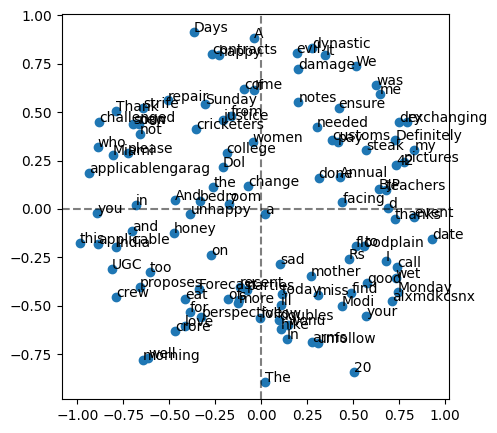

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(transf_embeddings[:,0], transf_embeddings[:,1])
for idx,row in enumerate(transf_embeddings):
    plt.text(row[0], row[1], str(words_used[idx]))
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0, color='k', linestyle='--', alpha=0.5)

In [51]:
words_used

Index(['20', '42', '7', 'A', 'And', 'Annual', 'BJP', 'Days', 'Definitely',
       'Dol',
       ...
       'unfollow', 'unhappy', 'was', 'well', 'wet', 'who', 'women', 'wonu',
       'you', 'your'],
      dtype='object', length=110)